#### Libraries

In [1]:
#! pip install jupyter_black

In [2]:
# basic libraries

import warnings

warnings.filterwarnings("ignore")  # category=DeprecationWarning
import os

# Mise en page
import jupyter_black

jupyter_black.load()

In [3]:
import pandas as pd
import zipfile
import io
from dask import dataframe as df1
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import warnings
from sklearn.decomposition import PCA
from fanalysis.pca import PCA as PCA_A
from sklearn.metrics import silhouette_samples
from yellowbrick.cluster import SilhouetteVisualizer

In [4]:
# Set up path

PATH = os.path.join(os.getcwd(), "data")

### Loading the data

In [3]:
#!pip install dask

In [33]:
# We import the dataset and record the time needed for importing it.

from dask import dataframe as dd
import time

# time taken to read data
s_time_dask = time.time()
dask_df = dd.read_csv(
    "COVID19_twitter_full_dataset.csv",  # , blocksize="400mb"
    # index_col=0,
)

# Set the index column after reading the CSV
# dask_df = dask_df.set_index("Unnamed: 0")
# dask_df = dask_df.drop(columns=["Unnamed: 0"])

e_time_dask = time.time()

print("Read with dask: ", (e_time_dask - s_time_dask), "seconds")

# data
dask_df.head(10)

Read with dask:  0.05470395088195801 seconds


,tweet_id,user_id,tweet_timestamp,keyword,country/region,valence_intensity,fear_intensity,anger_intensity,happiness_intensity,sadness_intensity,sentiment,emotion
0,1221957211913457664,1319491585,2020-01-27 16-44-36,wuhan,Malaysia,0.336,0.575,0.505,0.184,0.507,negative,fear
1,1221957309829545985,1629375746,2020-01-27 16-45-00,wuhan,Malaysia,0.445,0.470,0.403,0.263,0.395,negative,fear
2,1221957488158789632,894465432,2020-01-27 16-45-42,wuhan,-,0.265,0.718,0.572,0.218,0.694,very negative,fear
3,1221957499730812929,165242082,2020-01-27 16-45-45,wuhan,-,0.362,0.770,0.506,0.200,0.586,negative,fear
4,1221957853482835968,735428110917722112,2020-01-27 16-47-09,wuhan,NaN,0.528,0.542,0.497,0.388,0.488,positive,happiness
5,1221958163785601024,1173417894585102337,2020-01-27 16-48-23,wuhan,NaN,0.365,0.624,0.489,0.221,0.509,negative,fear
6,1221958334661779458,18527874,2020-01-27 16-49-04,wuhan,United States,0.513,0.550,0.358,0.364,0.344,neutral or mixed,no specific emotion
7,1221958989472075777,1055322345982722049,2020-01-27 16-51-40,wuhan,NaN,0.391,0.533,0.472,0.228,0.467,negative,fear
8,1221959334793342976,1208960120320745472,2020-01-27 16-53-02,wuhan,NaN,0.632,0.372,0.286,0.495,0.406,positive,happiness
9,1221959351461720064,35527998,2020-01-27 16-53-06,wuhan,United States,0.526,0.387,0.421,0.364,0.368,positive,happiness


In [34]:
# We made a copy of the dataframe for convenience.

ddf_2 = dask_df.copy()

In [35]:
ddf_2.columns

Index(['tweet_id', 'user_id', 'tweet_timestamp', 'keyword', 'country/region',
       'valence_intensity', 'fear_intensity', 'anger_intensity',
       'happiness_intensity', 'sadness_intensity', 'sentiment', 'emotion'],
      dtype='object')

In [36]:
# As instrcuted, three classes are required only, so we replaced the classes with 'negative', 'positive', and neutral.

ddf_2["sentiment"] = ddf_2["sentiment"].replace("very negative", "negative")
ddf_2["sentiment"] = ddf_2["sentiment"].replace("very positive", "positive")
ddf_2["sentiment"] = ddf_2["sentiment"].replace("neutral or mixed", "neutral")

In [17]:
# Before splitting, we take a look at the counts of each sentiments.

ddf_2["sentiment"].value_counts().compute()

sentiment
negative    118832924
positive     48757831
neutral      30787429
Name: count, dtype: int64

In [38]:
# Select the intensity and sentiment columns

ddf_q2 = ddf_2[
    [
        "valence_intensity",
        "fear_intensity",
        "anger_intensity",
        "happiness_intensity",
        "sadness_intensity",
    ]
]

ddf_q2_y = ddf_2["sentiment"]

In [40]:
# Train Test split on dask dataframe

from dask_ml.model_selection import train_test_split

ddf_80, ddf_20, ddf_80_y, ddf_20_y = train_test_split(
    ddf_q2, ddf_q2_y, test_size=0.2, random_state=42, shuffle=True
)
ddf_20.head()

,valence_intensity,fear_intensity,anger_intensity,happiness_intensity,sadness_intensity
295218,0.419,0.344,0.390,0.349,0.374
533376,0.401,0.431,0.437,0.260,0.431
243549,0.424,0.591,0.518,0.296,0.463
214683,0.504,0.488,0.424,0.347,0.376
1022,0.388,0.618,0.489,0.234,0.506


In [ ]:
print(len(ddf_80))
print(len(ddf_20))
print(len(ddf_80_y))
print(len(ddf_20_y))

### Question 2

### Perform PCA

In [23]:
# Chat

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd


def pca_analysis_data(data):

    # Standardize the data
    metric_pca = (data - data.mean()) / data.std()

    # Perform PCA
    pca = PCA()
    pca.fit(metric_pca)

    # Explained variance
    explained_variance = pca.explained_variance_ratio_
    print(explained_variance)

    # Plot the eigenvalues
    plt.figure(figsize=(8, 5))
    plt.bar(
        range(1, len(explained_variance) + 1),
        explained_variance * 100,
        alpha=0.7,
        align="center",
    )
    plt.step(
        range(1, len(explained_variance) + 1),
        explained_variance.cumsum() * 100,
        where="mid",
        color="red",
    )
    plt.xlabel("Principal Component")
    plt.ylabel("Variance Explained (%)")
    plt.title("Explained Variance by Different Principal Components")
    plt.show()

    # Transform the dataset using PCA
    pca_dataset = pca.transform(metric_pca)

    return pca, pca_dataset

[0.8103347  0.08298649 0.05998125 0.03225618 0.01444138]


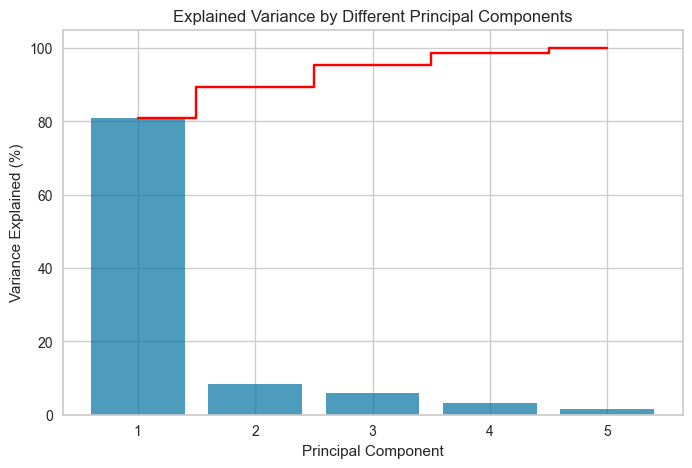

In [24]:
# We run the PCA function, and find out that the first component explain more than 80% of the variance.

pca_values, pca_dataset = pca_analysis_data(ddf_20)

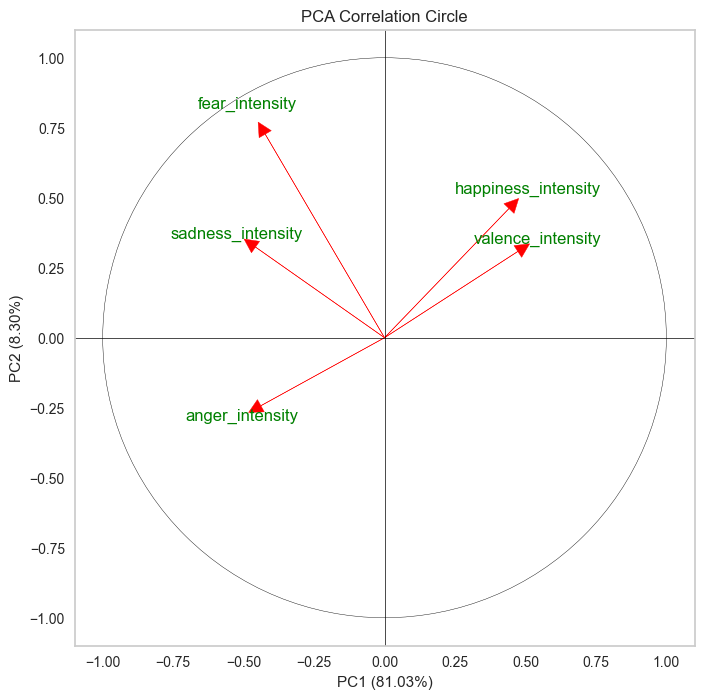

In [26]:
def plot_pca_correlation_circle(pca, data):
    pcs = pca.components_
    n_features = data.shape[1]
    fig, ax = plt.subplots(figsize=(8, 8))

    # Plot the circle
    circle = plt.Circle((0, 0), 1, color="black", fill=False)
    ax.add_artist(circle)

    for i in range(n_features):
        plt.arrow(
            0,
            0,
            pcs[0, i],
            pcs[1, i],
            head_width=0.05,
            head_length=0.05,
            fc="red",
            ec="red",
        )
        plt.text(
            pcs[0, i] * 1.15,
            pcs[1, i] * 1.15,
            data.columns[i],
            color="green",
            ha="center",
            va="center",
        )

    plt.xlim(-1.1, 1.1)
    plt.ylim(-1.1, 1.1)
    plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)")
    plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)")
    plt.grid()
    plt.axhline(0, color="black", lw=0.5)
    plt.axvline(0, color="black", lw=0.5)
    plt.title("PCA Correlation Circle")
    plt.show()


plot_pca_correlation_circle(pca_values, ddf_20)

In [42]:
# On PC1, the negative emotions are on the left with negative values while the positive emotions are on the right.
# On PC2, it divides the negative emotions with fear and sadness on the upper left while anger at the lower left.

### KMeans Clustering

In [27]:
pca_df = pd.DataFrame(pca_dataset, columns=["PC1", "PC2", "PC3", "PC4", "PC5"])
pca_df.head()

,PC1,PC2,PC3,PC4,PC5
0,-0.299602,1.564369,0.990311,-0.075363,0.383991
1,-2.335457,0.949038,-0.452720,-0.157072,-0.141699
2,-1.447604,0.251955,-0.384863,-0.062937,-0.045584
3,2.980900,1.378390,0.244612,0.898246,0.189816
4,-1.018571,-1.251729,-1.295114,0.964356,-0.015547


In [50]:
# Convert the Dask DataFrame to a Pandas DataFrame

pandas_dff_20 = ddf_20.compute()
print(type(pandas_dff_20))

<class 'pandas.core.frame.DataFrame'>


#! pip install --upgrade scikit-learn threadpoolctl

#import os
#os.environ["OPENBLAS_NUM_THREADS"] = "1"

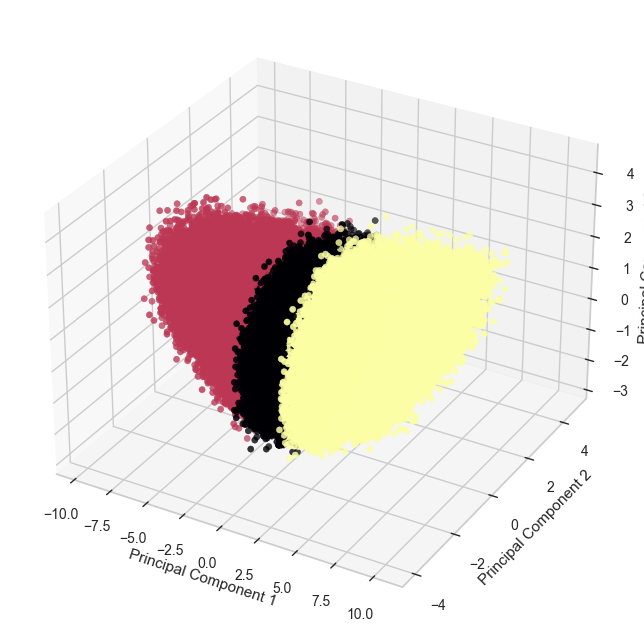

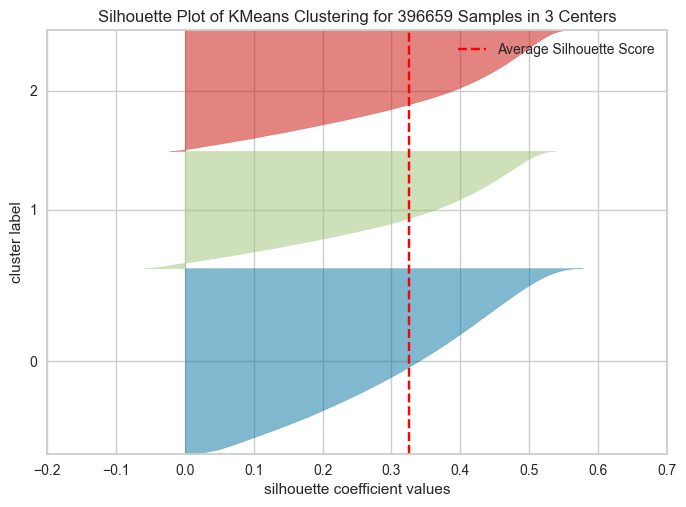

    valence_intensity  fear_intensity  anger_intensity  happiness_intensity  \
4               0.528           0.542            0.497                0.388   
5               0.365           0.624            0.489                0.221   
7               0.391           0.533            0.472                0.228   
8               0.632           0.372            0.286                0.495   
19              0.342           0.386            0.391                0.141   

    sadness_intensity  Cluster  
4               0.488        0  
5               0.509        1  
7               0.467        1  
8               0.406        2  
19              0.462        0  
        PC1       PC2       PC3       PC4       PC5  Cluster
0 -0.299602  1.564369  0.990311 -0.075363  0.383991        0
1 -2.335457  0.949038 -0.452720 -0.157072 -0.141699        1
2 -1.447604  0.251955 -0.384863 -0.062937 -0.045584        1
3  2.980900  1.378390  0.244612  0.898246  0.189816        2
4 -1.018571 -1.251729 

In [31]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from mpl_toolkits.mplot3d import Axes3D


def clustering_data(dataset, number_cluster, data_fig):
    """
    Perform K-Means clustering on the dataset, visualize the clusters, and compute cluster centroids.

    Parameters:
    dataset (pd.DataFrame): The input dataset for clustering.
    number_cluster (int): The number of clusters.
    data_fig (pd.DataFrame): The dataset transformed by PCA.

    Returns:
    tuple: A tuple containing the final dataset with cluster assignments,
           the DataFrame with clusters, and the DataFrame with cluster centroids.
    """
    kmeans = KMeans(n_clusters=number_cluster, random_state=42)
    kmeans.fit(dataset)
    y = kmeans.labels_

    df_k = data_fig.assign(Cluster=y)

    # Compute centroids
    centroids = kmeans.cluster_centers_
    titles = dataset.columns
    centroids_df = pd.DataFrame(centroids, columns=titles)
    centroids_indexed = centroids_df.reset_index().rename(
        {"index": "Cluster"}, axis="columns"
    )

    final_data = dataset.assign(Cluster=y)

    # 3D scatter plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection="3d")
    ax.scatter(df_k.iloc[:, 0], df_k.iloc[:, 1], df_k.iloc[:, 2], c=y, cmap="inferno")
    ax.set_xlabel("Principal Component 1")
    ax.set_ylabel("Principal Component 2")
    ax.set_zlabel("Principal Component 3")
    plt.show()

    # Silhouette plot
    dataset_sample = dataset.sample(frac=0.01, random_state=42)
    visualizer = SilhouetteVisualizer(kmeans, colors="yellowbrick")
    visualizer.fit(dataset_sample)
    visualizer.show()

    return final_data, df_k, centroids_indexed


# Example usage:
final_data_3, df_k_3, centroids_3 = clustering_data(pandas_dff_20, 3, pca_df)
print(final_data_3.head())
print(df_k_3.head())
print(centroids_3.head())

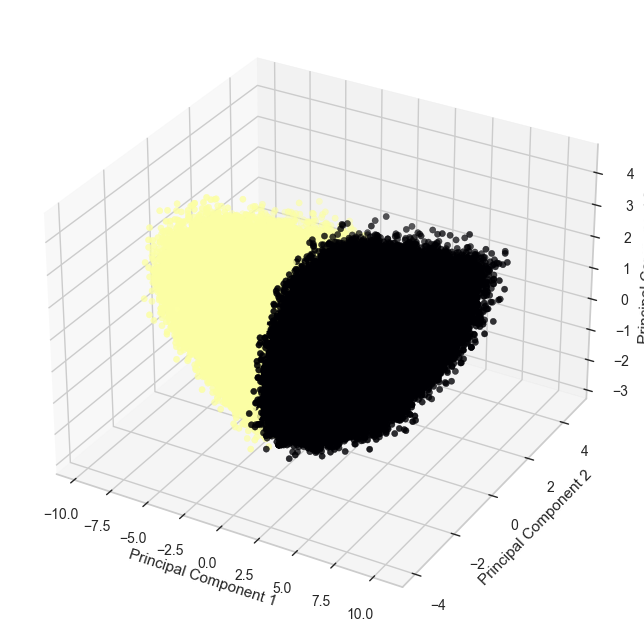

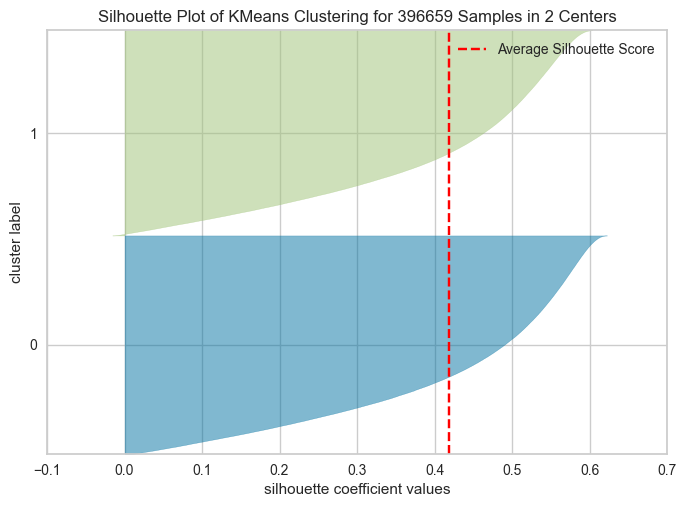

    valence_intensity  fear_intensity  anger_intensity  happiness_intensity  \
4               0.528           0.542            0.497                0.388   
5               0.365           0.624            0.489                0.221   
7               0.391           0.533            0.472                0.228   
8               0.632           0.372            0.286                0.495   
19              0.342           0.386            0.391                0.141   

    sadness_intensity  Cluster  
4               0.488        1  
5               0.509        1  
7               0.467        1  
8               0.406        0  
19              0.462        1  
        PC1       PC2       PC3       PC4       PC5  Cluster
0 -0.299602  1.564369  0.990311 -0.075363  0.383991        1
1 -2.335457  0.949038 -0.452720 -0.157072 -0.141699        1
2 -1.447604  0.251955 -0.384863 -0.062937 -0.045584        1
3  2.980900  1.378390  0.244612  0.898246  0.189816        0
4 -1.018571 -1.251729 

In [32]:
final_data_2, df_k_2, centroids_2 = clustering_data(pandas_dff_20, 2, pca_df)

print(final_data_2.head())
print(df_k_2.head())
print(centroids_2.head())

### Homogeneity score before assigning the remaining (k=3)

In [51]:
# True labels - 20% (ddf_20_y)

ddf_20_labels = ddf_20_y.compute()

In [52]:
type(ddf_20_labels)

pandas.core.series.Series

In [53]:
ddf_20_labels = ddf_20_labels.replace("negative", 0)
ddf_20_labels = ddf_20_labels.replace("positive", 1)
ddf_20_labels = ddf_20_labels.replace("neutral", 2)

In [54]:
# Fit KMeans model
kmeans_3 = KMeans(n_clusters=3, random_state=42)
kmeans_3.fit(pandas_dff_20)

# Initial clustering labels
initial_labels_3 = kmeans_3.labels_

In [55]:
from sklearn.metrics.cluster import homogeneity_score

# Initial clustering labels

initial_labels_3 = kmeans_3.labels_

# Calculate initial homogeneity score before

homogeneity_initial_3 = homogeneity_score(ddf_20_labels, initial_labels_3)
homogeneity_initial_3

0.46237304110296895

### Cosine Similarity and Assign the Remaining to Clusters (k=3)

In [56]:
# Convert the Dask DataFrame to a Pandas DataFrame

pandas_ddf_80 = ddf_80.compute()
print(type(pandas_ddf_80))

<class 'pandas.core.frame.DataFrame'>


In [57]:
# Assign clusters using cosine similarity
def assign_clusters(remaining_data, centroids):
    clusters = []
    for point in remaining_data.values:  # ensure point is a 1-D array
        similarities = [1 - cosine(point, centroid.flatten()) for centroid in centroids]
        assigned_cluster = np.argmax(similarities)
        clusters.append(assigned_cluster)
    return clusters

In [59]:
from joblib import Parallel, delayed
from scipy.spatial.distance import cosine
import numpy as np


# Function to calculate the assigned cluster for a single point
def assign_single_cluster(point, centroids):
    point = point.flatten()  # Ensure the point is 1-D
    similarities = [1 - cosine(point, centroid.flatten()) for centroid in centroids]
    return np.argmax(similarities)


# Assign clusters using parallel processing
def assign_clusters_parallel(data, centroids, n_jobs=-1):
    clusters = Parallel(n_jobs=n_jobs)(
        delayed(assign_single_cluster)(point, centroids) for point in data.values
    )
    return clusters


def assign_clusters_batch(data, centroids, batch_size=1000, n_jobs=-1):
    def process_batch(batch):
        return [assign_single_cluster(point, centroids) for point in batch]

    num_batches = int(np.ceil(len(data) / batch_size))
    results = Parallel(n_jobs=n_jobs)(
        delayed(process_batch)(data.iloc[i * batch_size : (i + 1) * batch_size].values)
        for i in range(num_batches)
    )
    return np.concatenate(results)


# Calculate centroids
centroids_3 = kmeans_3.cluster_centers_

# Convert remaining data to pandas DataFrame if it's a Dask DataFrame
pandas_remaining_data = pandas_ddf_80  # Assuming pandas_df_train is the remaining data

# Assign remaining data to clusters using batch processing
assigned_clusters_3 = assign_clusters_batch(pandas_remaining_data, centroids_3)

# Output results
print("Clusters for k=3:", assigned_clusters_3)

Clusters for k=3: [2 0 0 ... 0 0 2]


### Cosine Similarity and Assign the Remaining to Clusters (k=2)

In [115]:
# Fit KMeans model
kmeans_2 = KMeans(n_clusters=2, random_state=42)
kmeans_2.fit(pandas_dff_20)

KMeans(n_clusters=2, random_state=42)

In [116]:
# Calculate centroids
centroids_2 = kmeans_2.cluster_centers_

# Assign remaining data to clusters using batch processing
assigned_clusters_2 = assign_clusters_batch(pandas_remaining_data, centroids_2)

# Output results
print("Clusters for k=2:", assigned_clusters_2)

Clusters for k=2: [1 1 0 ... 1 1 1]


### Homogeneity score after assigning the remaining 80%

In [60]:
# True labels - 80% (ddf_80_y)

ddf_80_labels = ddf_80_y.compute()

In [68]:
ddf_80_labels = ddf_80_labels.replace("negative", 0)
ddf_80_labels = ddf_80_labels.replace("positive", 1)
ddf_80_labels = ddf_80_labels.replace("neutral", 2)

In [69]:
# Combined labels for homogeneity score calculation

combined_labels_3 = np.concatenate([initial_labels_3, assigned_clusters_3])

# Combined true labels

combined_true_labels = np.concatenate([ddf_20_labels, ddf_80_labels])

In [70]:
# Calculate homogeneity score after assigning remaining data points

homogeneity_final_3 = homogeneity_score(combined_true_labels, combined_labels_3)
print("Final Homogeneity Score for k=3:", homogeneity_final_3)

Final Homogeneity Score for k=3: 0.47173634819976457
